In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")

In [184]:
d= pd.read_csv(r'C:\Users\Akash Manral\Documents\ibm-hr-analytics-employee-attrition-performance\avocado.csv')
d

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Preprocessing and EDA

In [185]:
d.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [186]:
d.shape

(18249, 14)

In [187]:
d.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [188]:
d.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [189]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [190]:
d.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

<AxesSubplot:>

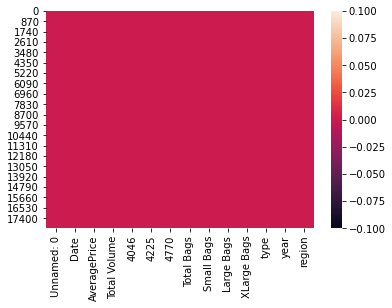

In [191]:
#to observe if any table has missing data or not
sns.heatmap(d.isnull())

# Visualization of categorical data

Orlando                338
SanDiego               338
Pittsburgh             338
Northeast              338
DallasFtWorth          338
Chicago                338
Portland               338
Atlanta                338
HarrisburgScranton     338
CincinnatiDayton       338
Boston                 338
SouthCentral           338
Louisville             338
Sacramento             338
StLouis                338
Philadelphia           338
BaltimoreWashington    338
GreatLakes             338
LosAngeles             338
Roanoke                338
Nashville              338
BuffaloRochester       338
Boise                  338
Plains                 338
SouthCarolina          338
Tampa                  338
Seattle                338
HartfordSpringfield    338
SanFrancisco           338
Southeast              338
California             338
NewYork                338
TotalUS                338
RaleighGreensboro      338
PhoenixTucson          338
Midsouth               338
Houston                338
N

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

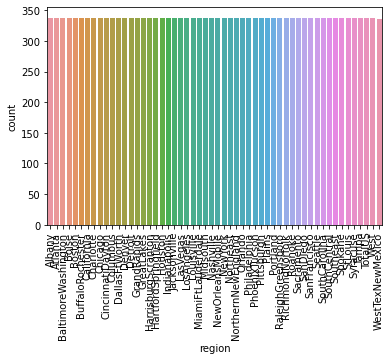

In [192]:
sns.countplot(x='region',data=d)
print(d['region'].value_counts())
plt.xticks(rotation=90)

conventional    9126
organic         9123
Name: type, dtype: int64


(array([0, 1]), [Text(0, 0, 'conventional'), Text(1, 0, 'organic')])

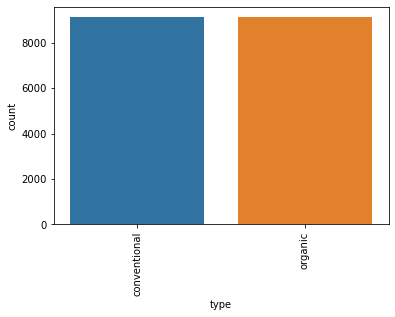

In [193]:
sns.countplot(x='type',data=d)
print(d['type'].value_counts())
plt.xticks(rotation=90)

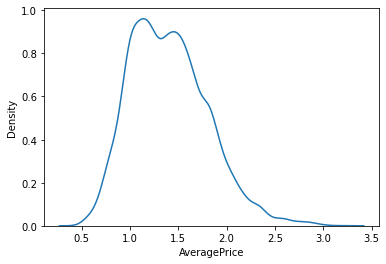

In [194]:
#kdeplot
sns.kdeplot(d["AveragePrice"])
plt.show()

In [195]:
d=d.drop(["Unnamed: 0","Date","year"],axis=1)

In [196]:
d.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


# Encoding the Data

In [197]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [198]:
for i in d.columns:
    if d[i].dtypes=="object":
        d[i]=enc.fit_transform(d[i].values.reshape(-1,1))


In [199]:
d

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0


In [200]:
d.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000


In [201]:
d.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280


<AxesSubplot:>

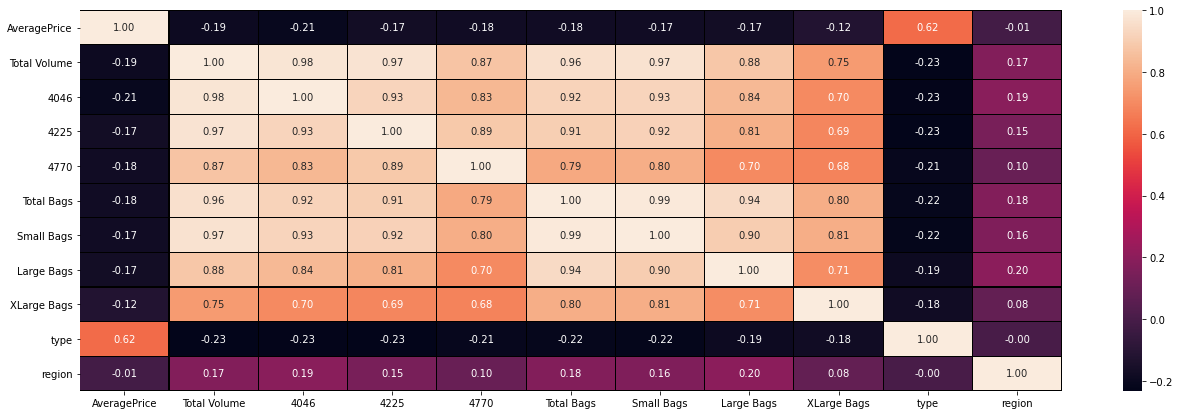

In [202]:
plt.figure(figsize=(22,7))
sns.heatmap(d.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

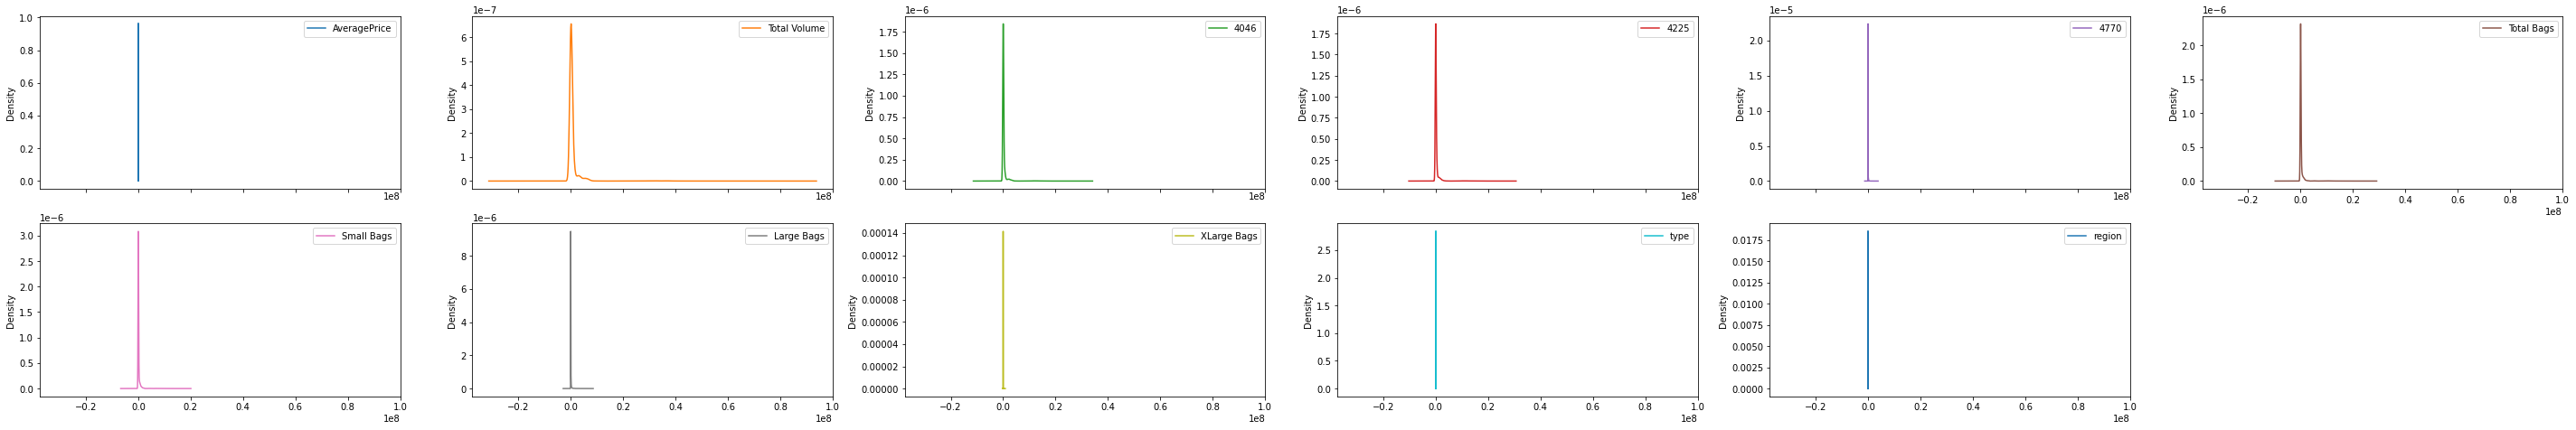

In [203]:
d.plot(kind="kde",subplots=True,layout=(12,6),figsize=(50,50))

In [204]:
d.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
dtype: float64

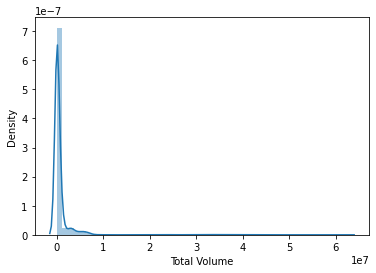

In [205]:
sns.distplot (d["Total Volume"])
plt.show()

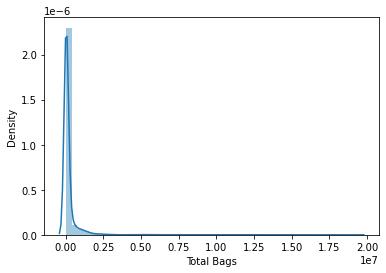

In [206]:
sns.distplot(d['Total Bags'])
plt.show()

# Plotting outliers

AveragePrice       AxesSubplot(0.125,0.826831;0.110714x0.053169)
Total Volume    AxesSubplot(0.257857,0.826831;0.110714x0.053169)
4046            AxesSubplot(0.390714,0.826831;0.110714x0.053169)
4225            AxesSubplot(0.523571,0.826831;0.110714x0.053169)
4770            AxesSubplot(0.656429,0.826831;0.110714x0.053169)
Total Bags      AxesSubplot(0.789286,0.826831;0.110714x0.053169)
Small Bags         AxesSubplot(0.125,0.763028;0.110714x0.053169)
Large Bags      AxesSubplot(0.257857,0.763028;0.110714x0.053169)
XLarge Bags     AxesSubplot(0.390714,0.763028;0.110714x0.053169)
type            AxesSubplot(0.523571,0.763028;0.110714x0.053169)
region          AxesSubplot(0.656429,0.763028;0.110714x0.053169)
dtype: object

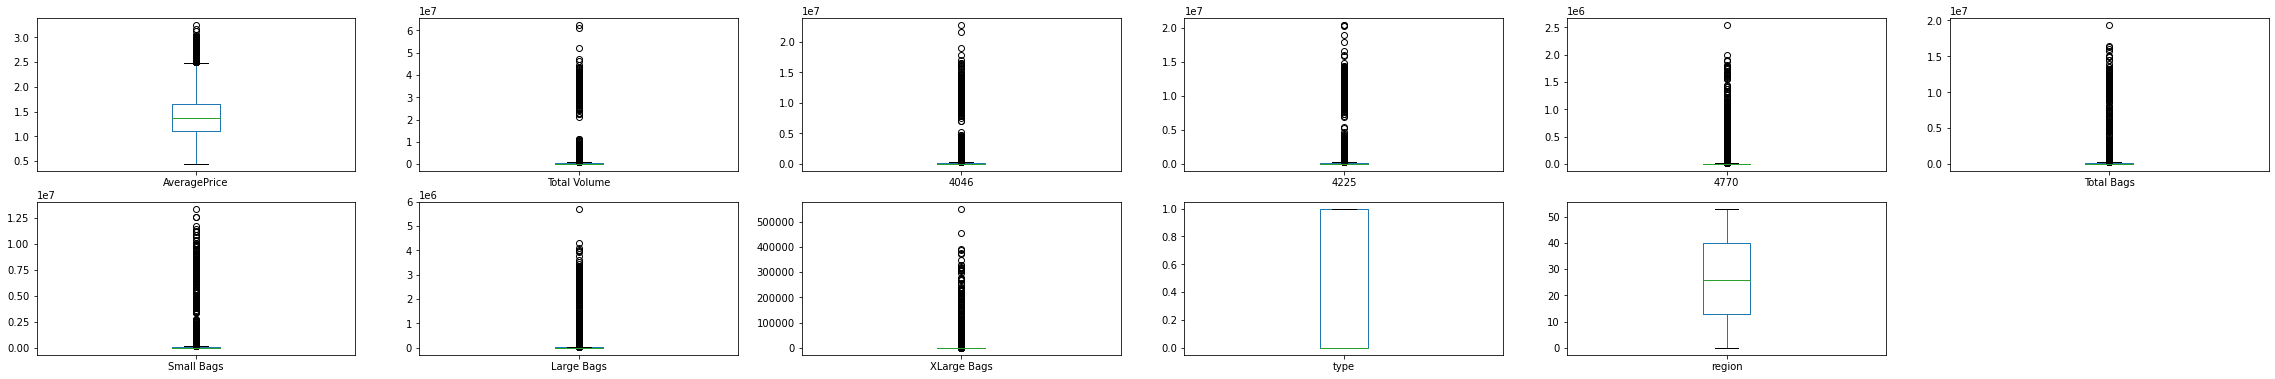

In [207]:
d.plot(kind="box",subplots=True,layout=(12,6),figsize=(40,40))

# Checking Outliers

In [208]:
import numpy as np
import scipy
from scipy.stats import zscore
z=np.abs(zscore(d))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.17557961, 0.99983562,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.17557961, 0.99983562,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.17557961, 0.99983562,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.17557961, 1.00016441,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.17557961, 1.00016441,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.17557961, 1.00016441,
        1.70081131]])

In [209]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [210]:
d2=d[(z<3).all(axis=1)]
d2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0


In [211]:
d2.shape

(17651, 11)

In [212]:
d.shape

(18249, 11)

In [213]:
d.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
region          float64
dtype: object

# 1- for finding the AveragePrice

# dividing data in features and vectors-

In [214]:
#independent feature
x=d2.drop("AveragePrice",axis=1)

#dependent feature
y=d2["AveragePrice"]

In [215]:
x.shape

(17651, 10)

In [216]:
x.shape[1]

10

# multicollinearity

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["FEATURES"]= x.columns
    print(vif)

In [218]:
vif_calc()

     VIF FACTOR      FEATURES
0  4.975967e+08  Total Volume
1  8.725164e+07          4046
2  7.502190e+07          4225
3  5.279868e+05          4770
4  2.333471e+13    Total Bags
5  1.518921e+13    Small Bags
6  1.478044e+12    Large Bags
7  7.091283e+09   XLarge Bags
8  1.798162e+00          type
9  2.157353e+00        region


In [219]:
x=x.drop(["Total Bags"],axis=1)

In [220]:
vif_calc()

     VIF FACTOR      FEATURES
0  4.975940e+08  Total Volume
1  8.725116e+07          4046
2  7.502149e+07          4225
3  5.279839e+05          4770
4  2.523777e+07    Small Bags
5  2.454158e+06    Large Bags
6  1.176196e+04   XLarge Bags
7  1.798079e+00          type
8  2.156831e+00        region


In [221]:
x=x.drop(["Total Volume"],axis=1)
vif_calc()

   VIF FACTOR     FEATURES
0    2.510309         4046
1    3.608423         4225
2    2.103647         4770
3    5.695429   Small Bags
4    1.921718   Large Bags
5    1.891986  XLarge Bags
6    1.794656         type
7    2.156673       region


# Linear Regression model

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,r2_score

In [223]:
x.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0


In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lm.fit(x_train,y_train)

LinearRegression()

In [225]:
lm.coef_

array([-1.39126819e-07,  1.11536411e-07, -6.78464157e-07, -3.87038119e-08,
       -2.66677776e-07,  5.54697427e-06,  4.50370465e-01,  2.53578996e-04])

In [226]:
lm.intercept_

1.1871920411245438

In [227]:
#predicting the value
pred=lm.predict(x_test)
print("price",pred)

price [1.10342022 1.27466406 1.19684269 ... 1.05290142 1.64512609 1.64733803]


In [228]:
dframe=pd.DataFrame(y_test,pred)

In [229]:
dfr=pd.DataFrame({"Actual Price":y_test,"Predicted Price":pred})
dfr

,Actual Price,Predicted Price
3596,1.36,1.103420
7141,1.70,1.274664
4625,1.22,1.196843
5456,0.81,1.153628
10969,1.85,1.646501
...,...,...
8444,1.01,1.122277
2955,1.12,1.229918
4566,0.51,1.052901
10795,1.55,1.645126


In [230]:
lm.score(x_train,y_train)

0.4062506432142965

In [231]:
import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [232]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error: 0.23419115997109008


In [233]:
print("mean_squared_error:",metrics.mean_squared_error(y_test,pred))

mean_squared_error: 0.08915927108123313


In [234]:
print("mean_squared_error:",metrics.mean_squared_error(y_test,pred))

mean_squared_error: 0.08915927108123313


In [235]:
print("Root mean_squared_error:",math.sqrt(metrics.mean_squared_error(y_test,pred)))

Root mean_squared_error: 0.29859549742290675


# classifiers

In [236]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

dtc=DecisionTreeRegressor()
KN=KNeighborsRegressor()
svr=SVR()

In [237]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion="mse")
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [238]:
model=[dtc,KN,svr]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    print(r2_score(predm,y_test))

0.6038304559416815
0.5589280638958656
-0.4239687602796609


In [239]:
preddtc1=dtc.predict(x_test)
dframe3=pd.DataFrame(y_test,preddtc1)
dfr3=pd.DataFrame({"Actual price":y_test,"Predicted price":preddtc1})
dfr3

,Actual price,Predicted price
3596,1.36,1.23
7141,1.70,1.72
4625,1.22,1.29
5456,0.81,0.93
10969,1.85,1.85
...,...,...
8444,1.01,0.88
2955,1.12,1.21
4566,0.51,0.52
10795,1.55,1.62


In [240]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,preddtc1))
print("mean_squared_error:",metrics.mean_squared_error(y_test,preddtc1))
print("mean_squared_error:",metrics.mean_squared_error(y_test,preddtc1))
print("Root mean_squared_error:",math.sqrt(metrics.mean_squared_error(y_test,preddtc1)))

Mean Absolute Error: 0.16229871244635194
mean_squared_error: 0.05950223175965665
mean_squared_error: 0.05950223175965665
Root mean_squared_error: 0.24393079297140133


# Lasso and Ridge models

In [241]:
from sklearn.linear_model import Lasso,Ridge
las=Lasso()
rdg=Ridge()
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)


0.40625064321429605

In [242]:
rdg.coef_

array([-1.39126821e-07,  1.11536406e-07, -6.78464177e-07, -3.87038111e-08,
       -2.66677788e-07,  5.54697413e-06,  4.50370446e-01,  2.53579025e-04])

In [243]:
pred1=rdg.predict(x_test)
pred

array([1.10342022, 1.27466406, 1.19684269, ..., 1.05290142, 1.64512609,
       1.64733803])

In [244]:
r2_score(pred,y_test)

-0.4656560342221885

In [245]:
las=Lasso(alpha=.0001,random_state=45)
las.fit(x_train,y_train)
las.score(x_train,y_train)


0.40625031271331546

In [246]:
las.coef_

array([-1.39194590e-07,  1.11404876e-07, -6.79026390e-07, -3.86797029e-08,
       -2.66979388e-07,  5.54311241e-06,  4.49878267e-01,  2.53876285e-04])

In [247]:
pred1=rdg.predict(x_test)
pred1

array([1.10342022, 1.27466406, 1.1968427 , ..., 1.05290143, 1.64512608,
       1.64733802])

In [248]:
r2_score(pred1,y_test)

-0.4656561153194545

# 2- finding the region(classification model)

In [249]:
#independent feature
x=d2.drop("region",axis=1)

#dependent feature
y=d2["region"]

In [250]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0


In [251]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: region, dtype: float64

In [252]:
y.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 52.,
       53., 51.])

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


# classifiers

In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
svc=SVC()

In [255]:
model=[dtc,mnb,svc]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier() is
0.7792274678111588
[[82  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  3]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  1 62  0]
 [ 0  2  0 ...  0  0 69]]
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       113
         1.0       0.64      0.65      0.65       110
         2.0       0.92      0.83      0.87       111
         3.0       0.74      0.73      0.74       109
         4.0       0.82      0.86      0.84       120
         5.0       0.71      0.71      0.71       119
         6.0       0.94      0.97      0.96       101
         7.0       0.85      0.83      0.84       125
         8.0       0.90      0.93      0.92       102
         9.0       0.80      0.71      0.75       121
        10.0       0.66      0.71      0.68        99
        11.0       0.87      0.85      0.86       121
        12.0       0.85      0.89      0.87       117
        13.0       0.7

KeyboardInterrupt: 

In [257]:
preddtc=dtc.predict(x_test)

In [258]:
dframe2=pd.DataFrame(y_test,preddtc)
dfr2=pd.DataFrame({"Actual region":y_test,"Predicted region":preddtc})
dfr2

,Actual region,Predicted region
3596,15.0,15.0
7141,28.0,28.0
4625,34.0,34.0
5456,50.0,12.0
10969,35.0,35.0
...,...,...
8444,53.0,53.0
2955,2.0,2.0
4566,33.0,33.0
10795,32.0,47.0
